In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
my_path = "/content/gdrive/My Drive/5243_Project1/"
data_path = "data/"
result_path =  "fig/"
output_path = "output/"

cleaned_hm = pd.read_csv(my_path + data_path + "cleaned_hm.csv")
senselabel = pd.read_csv(my_path + data_path + "senselabel.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [155]:
cleaned_hm.head(3)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I felt sympathy and connection with.,I went on a successful date with someone I felt sympathy and connection with.,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his examination,I was happy when my son got 90% marks in his examination,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise


In [3]:
### reveal all hidden data columns/rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', 500)

In [5]:
cleaned_hm.predicted_category.value_counts()

affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: predicted_category, dtype: int64

**GOAL**: The goal of this project is to look deeper into the causes that make us happy. Natural language processing and text mining are natural tools to derive interesting findings in this collection of happy moments.

From the data, some of the categories are clear for causes of happiness. For example, the category "exercise" capture the happy moment of working out in gym, running or jogging. Similarly, the category "nature" is also clear regarding the reason of happiness, which is about trip, nature landscrape or weather. However, on the other hand, some of the categories are not so clear, which includes, `enjoy the moment`, `affection` and `bonding`. We want to dig into more detailed reason of the happy moments.



In [6]:
import spacy
import en_core_web_sm
import re

!python -m spacy download en_core_web_sm

class text_preprocessing:
    def __init__(self, nlp = None, pos_white_list = [], dep_white_list = [], \
                 pos_black_list = [], alpha_only = True, \
                 min_token_len = 2):
        if nlp is None:
            nlp = en_core_web_sm.load()
        self.nlp = nlp
        self.pos_white_list = pos_white_list
        self.dep_white_list = dep_white_list
        self.pos_black_list = pos_black_list
        self.min_token_len = min_token_len
        self.alpha_only = alpha_only

    def is_noise(self, token):
        if token.lemma_.lower() in self.nlp.Defaults.stop_words or token.text.lower() in self.nlp.Defaults.stop_words:
            return True
        if token.is_stop:
            return True
        if self.alpha_only:
            if token.is_alpha is False:
                return True
        if token.pos_ in self.pos_white_list or token.dep_ in self.dep_white_list:
            return False
        if len(token.text) <= self.min_token_len:
            return True
        if token.pos_ in self.pos_black_list:
            return True
        return False

    def fit_transform(self, docs):
        docs = [re.sub(r'[^\w\s]', ' ', doc) for doc in docs]
        docs = self.nlp.pipe(docs)
        unigram_result = []
        for doc in docs:
            unigram = []
            for token in doc:
                if self.is_noise(token):
                    continue
                else:
                    unigram.append(token.lemma_.lower())
            unigram_result.append(unigram)
        return unigram_result


2023-09-19 21:29:11.174731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
affection = cleaned_hm[(cleaned_hm.predicted_category == "affection") & (cleaned_hm.modified == True)].drop_duplicates(subset = ["cleaned_hm"]).reset_index(drop = True)
enjoy_the_moment = cleaned_hm[(cleaned_hm.predicted_category == "enjoy_the_moment") & (cleaned_hm.modified == True)].drop_duplicates(subset = ["cleaned_hm"]).reset_index(drop = True)
bonding = cleaned_hm[(cleaned_hm.predicted_category == "bonding") & (cleaned_hm.modified == True)].drop_duplicates(subset = ["cleaned_hm"]).reset_index(drop = True)


In [9]:
enjoy_the_moment.head(3)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27681,3,24h,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,True,1,NaN,enjoy_the_moment
1,27718,1566,24h,I cooked and ate a wonderful sausage and cheese omelet.,I cooked and ate a wonderful sausage and cheese omelet.,True,1,NaN,enjoy_the_moment
2,27724,10576,24h,The phone that I have ordered in a local online store was delivered this morning. I like the phone so much!,The phone that I have ordered in a local online store was delivered this morning. I like the phone so much!,True,2,enjoy_the_moment,enjoy_the_moment


In [10]:
enjoy_the_moment.wid.unique().shape

(4146,)

In [11]:
len(enjoy_the_moment)

10318

In [12]:
enjoy_the_moment.groupby(["wid"]).size().reset_index(name = "counts").sort_values(by = "counts", ascending = False).head(10)


,wid,counts
112,120,38
212,225,26
51,58,25
390,412,24
526,555,23
453,480,23
689,738,22
393,415,22
206,219,21
19,22,21


In [13]:
enjoy_the_moment[enjoy_the_moment.wid == 120].head(3)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
335,31175,120,24h,"I have lots to be happy about this summer, It wasn't so simple, but I helped to open a new library branch in my city past month.","I have lots to be happy about this summer, It wasn't so simple, but I helped to open a new library branch in my city past month.",True,1,NaN,enjoy_the_moment
403,32174,120,24h,I have had the opportunity to meditate a lot in my life and this has gotten me to a point where I practiced gratitude to the point where simply looking outside makes me happy.,I have had the opportunity to meditate a lot in my life and this has gotten me to a point where I practiced gratitude to the point where simply looking outside makes me happy.,True,1,NaN,enjoy_the_moment
856,36174,120,24h,"I can think of a lovely surprise to share yesterday my last event. Iam going to tell something what it was, where it happened and when, and then explain exactly why the unexpected happening made me so happy lest event, I really like last event in my life.","I can think of a lovely surprise to share yesterday my last event. Iam going to tell something what it was, where it happened and when, and then explain exactly why the unexpected happening made me so happy lest event, I really like last event in my life.",True,2,NaN,enjoy_the_moment


In [163]:
analysis_data2.wid.unique().shape

(10841,)

In [164]:
len(analysis_data2)

100535

### enjoy_the_moment

- After deduplicate by column `cleaned_hm`
- Num of total happy moments: 10318
- Num of unique worker: 4183
- The max number of happy moment the individual work shared is 38

In [14]:
import os
directory_path = my_path + data_path + "topic_dict/"
filenames = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
seed_words = {}
for filename in filenames:
    topic_name = filename.split("-")[0]
    file_path = os.path.join(directory_path, filename)
    with open(file_path, "r") as file:
        content = pd.read_csv(file, header=None)
        keywords_str_list = [" ".join(list(content[0]))]
        keywords = text_preprocessing().fit_transform(keywords_str_list)
        seed_words[topic_name] = list(set(keywords[0]))

In [15]:
cleaned_hm.predicted_category.value_counts()

affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: predicted_category, dtype: int64

In [17]:
pos_black_list = ["", "SPACE"]
train_data = cleaned_hm[(cleaned_hm.predicted_category != "exercise") & (cleaned_hm.predicted_category != "nature") & (cleaned_hm.predicted_category != "achievement")\
                        & (cleaned_hm.modified == True)].drop_duplicates(subset = ["cleaned_hm"]).reset_index(drop = True)

cleaned_token = text_preprocessing(min_token_len = 1,\
                 pos_black_list = pos_black_list).fit_transform(train_data.cleaned_hm)

In [19]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.6 MB/s eta 0:00:00
  Preparing metadata (s

In [20]:
from bertopic import BERTopic
seed_topic_list = list(seed_words.values())
cleaned_token_str = [" ".join(x) for x in cleaned_token]

topic_model = BERTopic(seed_topic_list=seed_topic_list, n_gram_range=(1, 2),calculate_probabilities=True, nr_topics = 30)
topic_model = topic_model.fit(cleaned_token_str)
topic_model.save(my_path + result_path + "my_model")

# topics, probs = topic_model.fit_transform(cleaned_token_str)

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [25]:
topics, probs = topic_model.transform(cleaned_token_str)

In [153]:
train_data.predicted_category.value_counts()

affection           32277
enjoy_the_moment    10318
bonding             10023
leisure              6595
Name: predicted_category, dtype: int64

### Story tell.

- Why we use topic modeling?
- The goal of the project is to find out the cause of happy moment. There are some categories including affection, enjoy_the_moment, bonding, nature, exercises, etc. in data that come from some predicted model. However, most of the categories are too broad to align with our use case. For example, the moment, "I cooked and ate a wonderful sausage and cheese omelet" was labeled as "enjoy_the_moment" by their model, which is not so informative, instead, we expected the happiness came from food.
- Our solution is to provide more detailed insight to figure out the source of happiness.
- Orginal topics including affection, enjoy the moment, bonding, leisure  are too board to capture the detailed source of happyness.

  - Our topics


In [37]:
# topic_model.get_topic_info()


### All topics
achievement, leisure, nature, exercise, family, food, pet, party, vacation, entertainment, shopping, health, work, routine, art, philosophy, politics.

Sentence:
My son woke me up to a fantastic breakfast of eggs, his special hamburger patty and pancakes.

- Old Label: affection
- New Label: affection, food

In [42]:
cluster_topic_mapping = {-1: "family", 0: "food", 1: "family", 2: "party", 3: "pet", 4: "vacation", \
                         5: "family", 6: "exercise", 7: "entertainment", 8: "shopping", 9: "bonding", \
                         10: "school", 11: "entertainment", 12: "routine", 13: "exercise", 14: "entertainment", \
                         15: "entertainment", 16: "health", 17: "routine", 18: "work", 19: "routine", 20: "art", \
                         21: "art", 22: "routine", 23: "routine", 24: "family", 25: "vacation", 26: "philosophy", 27: "politics", \
                         28: ""}

def model_post_mapping(topic_list, mapping_dict):
    return [mapping_dict[x] for x in topic_list]

post_topics = model_post_mapping(topics, cluster_topic_mapping)



In [70]:
pos_white_list = ["VERB", "NOUN", "ADJ"]
dep_white_list = ["amod"]
pos_black_list = ["", "ADV", "AUX", "CONJ", "CCONJ", "DET", "INTJ", "NUM", "PART", "PUNCT", "SCONJ", "SYM", "X", "SPACE"]
cleaned_token_analysis = text_preprocessing(pos_white_list = pos_white_list, dep_white_list = dep_white_list, \
                 pos_black_list = pos_black_list).fit_transform(cleaned_hm.cleaned_hm)

cleaned_token_analysis_str = [" ".join(x) for x in cleaned_token_analysis]

In [71]:

cleaned_hm2 = cleaned_hm.copy()

cleaned_hm2["cleaned_text"] = cleaned_token_analysis_str
train_data["predicted_happy_cause"] = post_topics

select_analysis_columns = ["hmid", "wid", "reflection_period", "cleaned_hm", "cleaned_text", "predicted_category", "predicted_happy_cause"]

analysis_data = cleaned_hm2.merge(train_data[["hmid", "predicted_happy_cause"]], on = "hmid", how = "left").fillna(value = {"predicted_happy_cause": "", "cleaned_text": ""})[select_analysis_columns]



In [73]:

demographic = pd.read_csv(my_path + data_path + "demographic.csv")


In [74]:
demographic.head(3)

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n


In [91]:
txt = "56.0"

x = txt.isnumeric()

print(x)

False


In [103]:
def age_convert(age):
    if "." in age:
        age = age.split(".")[0]
    if age.isnumeric():
        return int(age)
    else:
        return -1

def age_bin_norm(age, bin_norm):
    for age_range, category in bin_norm.items():
        age_range_int = [int(x) for x in age_range.split("-")]
        if len(age_range_int) == 1:
            if age >= age_range_int[0]:
                return category
        elif age >= age_range_int[0] and age <= age_range_int[1]:
            return category
    return "other"



bin_norm = {"0-18": "child", "19-29": "young_adult", "30-44": "mid_adult", "45-64": "late_adult", "65": "elder"}


analysis_data2 = analysis_data.merge(demographic, on = "wid", how = "left")

analysis_data2["age_category"] = analysis_data2["age"].fillna("-1").apply(lambda x: age_bin_norm(age_convert(x), bin_norm))

analysis_data2.loc[analysis_data2['predicted_happy_cause'] == '', 'predicted_happy_cause'] = analysis_data2['predicted_category']

analysis_data2

In [143]:
age_happy_cause = analysis_data2.groupby(["age_category", "predicted_happy_cause"])["hmid"].count().reset_index().sort_values(by = ["age_category", "hmid"], ascending = False)
age_happy_cause = age_happy_cause.groupby('age_category', group_keys=False).apply(lambda x: x.nlargest(5, 'hmid')).rename(columns = {"hmid": "hmid_count"})



In [148]:
age_happy_cause.to_csv(my_path + output_path + "age_happy_cause.csv", index = False)
analysis_data2.to_csv(my_path + output_path + "analysis_data.csv", index = False)

In [147]:
age_happy_cause[age_happy_cause.age_category != "other"].reset_index(drop = True)

,age_category,predicted_happy_cause,hmid_count
0,child,achievement,248
1,child,family,179
2,child,food,30
3,child,entertainment,26
4,child,exercise,17
5,elder,family,491
6,elder,achievement,427
7,elder,food,60
8,elder,exercise,42
9,elder,nature,34


In [128]:
analysis_data2.head(3)

,hmid,wid,reflection_period,cleaned_hm,cleaned_text,predicted_category,predicted_happy_cause,age,country,gender,marital,parenthood,age_category
0,27673,2053,24h,I went on a successful date with someone I felt sympathy and connection with.,successful date feel sympathy connection,affection,family,35,USA,m,single,n,mid_adult
1,27674,2,24h,I was happy when my son got 90% marks in his examination,happy son mark examination,affection,family,29.0,IND,m,married,y,young_adult
2,27675,1936,24h,I went to the gym this morning and did yoga.,gym morning yoga,exercise,exercise,30,USA,f,married,y,mid_adult


In [131]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()



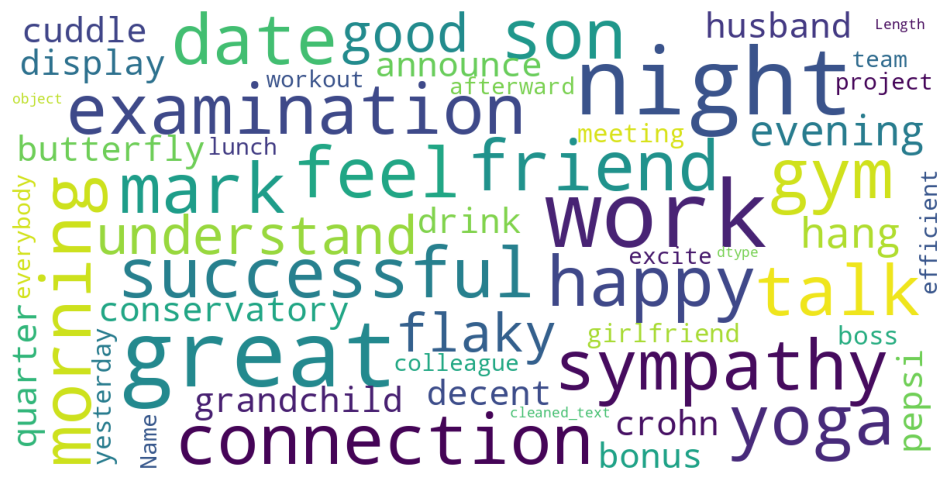

In [130]:
show_wordcloud(analysis_data2['cleaned_text'])


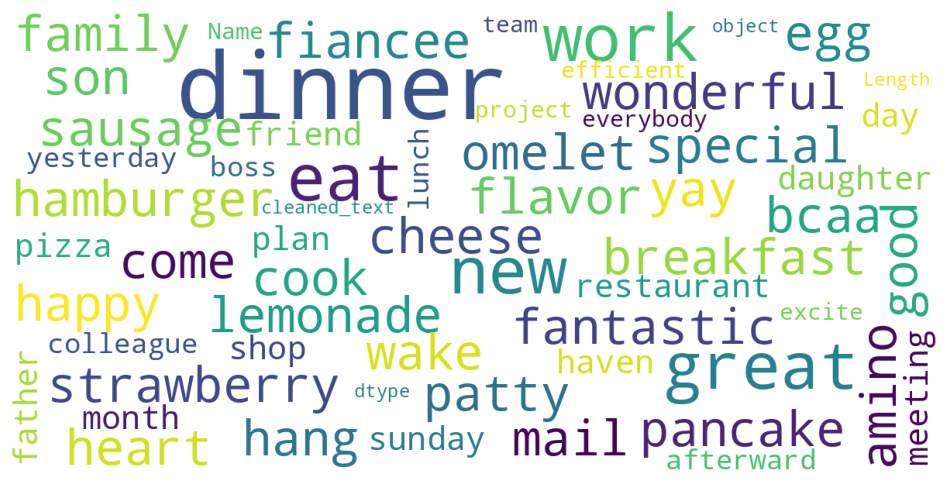

In [135]:
topic_word_cloud = analysis_data2[analysis_data2.predicted_happy_cause	== "food"].reset_index(drop = True)
show_wordcloud(topic_word_cloud['cleaned_text'])


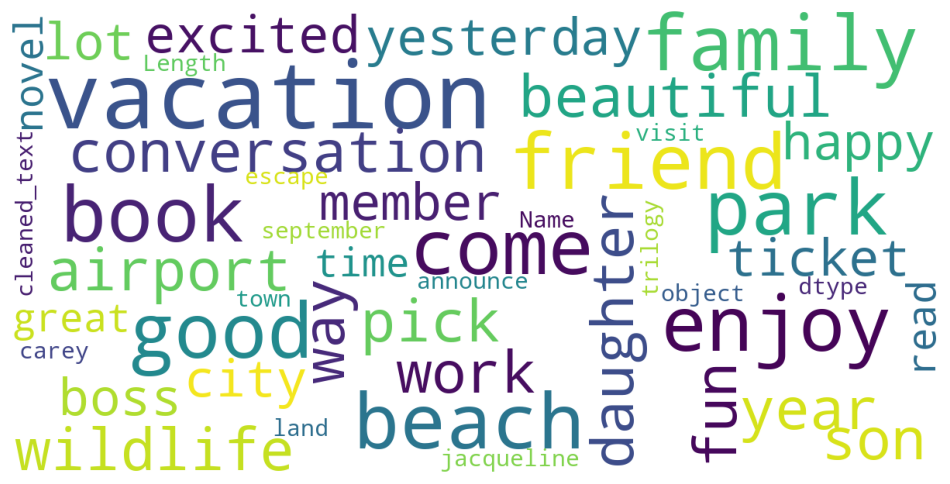

In [149]:
topic_word_cloud = analysis_data2[analysis_data2.predicted_happy_cause	== "vacation"].reset_index(drop = True)
show_wordcloud(topic_word_cloud['cleaned_text'])

In [137]:
analysis_data2.predicted_happy_cause.value_counts()


family              35248
achievement         33993
food                 5946
exercise             3559
entertainment        3285
party                2395
vacation             1982
pet                  1948
affection            1913
bonding              1897
nature               1843
routine              1574
shopping             1260
leisure               872
enjoy_the_moment      833
school                749
art                   413
health                395
work                  344
philosophy             46
politics               40
Name: predicted_happy_cause, dtype: int64

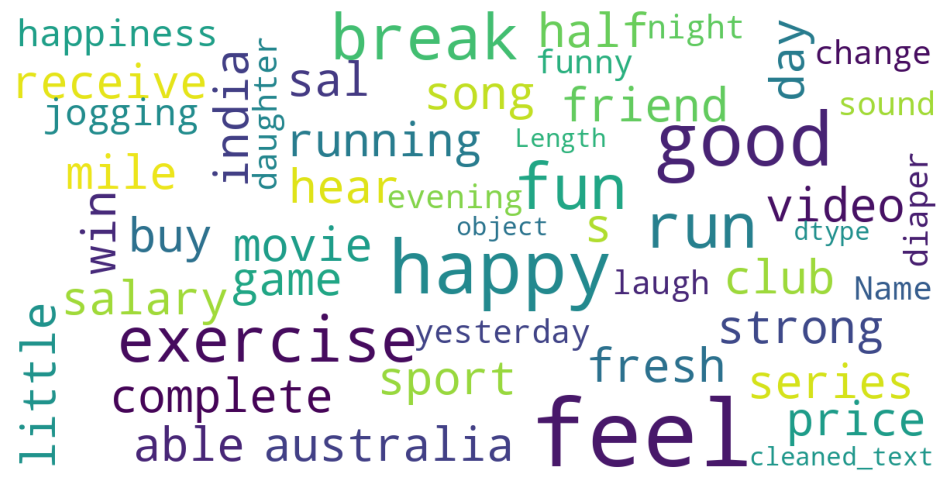

In [150]:
### Youth Adult exericise & entertainment topics
#### Keywords
topic_word_cloud = analysis_data2[((analysis_data2.predicted_happy_cause	== "exercise") | (analysis_data2.predicted_happy_cause	== "entertainment")) & (analysis_data2.age_category	== "young_adult")].reset_index(drop = True)
show_wordcloud(topic_word_cloud['cleaned_text'])

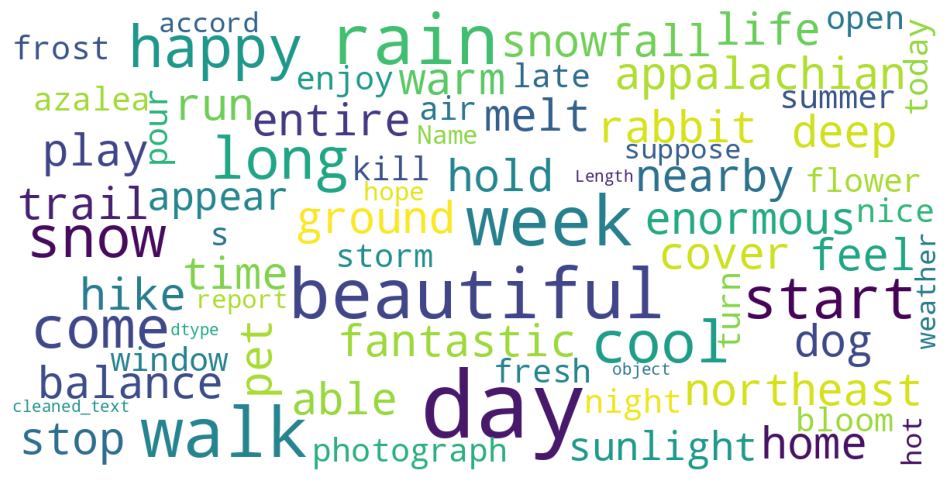

In [151]:
topic_word_cloud = analysis_data2[((analysis_data2.predicted_happy_cause	== "pet") | (analysis_data2.predicted_happy_cause	== "nature")) & (analysis_data2.age_category	== "late_adult")].reset_index(drop = True)
show_wordcloud(topic_word_cloud['cleaned_text'])

In [160]:

from google.colab import files

analysis_data2.to_csv('analysis_data2.csv', index=False)
files.download('analysis_data2.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
analysis_data2.head(3)


,hmid,wid,reflection_period,cleaned_hm,cleaned_text,predicted_category,predicted_happy_cause,age,country,gender,marital,parenthood,age_category
0,27673,2053,24h,I went on a successful date with someone I felt sympathy and connection with.,successful date feel sympathy connection,affection,family,35,USA,m,single,n,mid_adult
1,27674,2,24h,I was happy when my son got 90% marks in his examination,happy son mark examination,affection,family,29.0,IND,m,married,y,young_adult
2,27675,1936,24h,I went to the gym this morning and did yoga.,gym morning yoga,exercise,exercise,30,USA,f,married,y,mid_adult
